# Cinetique du vide

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tuftelike
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

In [2]:
from options import *
import matplotlib as mpl

# mpl.use('pgf')
mpl.rcParams.update(rcParams)

## Pompe à palettes

In [3]:
data = np.loadtxt("../data/palette.csv", float, delimiter=",", skiprows=1)
t_start = 4
time = data[:,0] - t_start  # s
pressure = unp.uarray(data[:,1], data[:,2])  # mbar
V = ufloat(5.5, 0.05)  # L

In [4]:
p1 = pressure[12]
idx = time < 100
plim = ufloat(1e-2, 1e-3)
plog = unp.log((pressure[idx] - plim) / (p1 - plim))
f"{p1=:.1uP}"

'p1=(6.2±0.1)×10²'

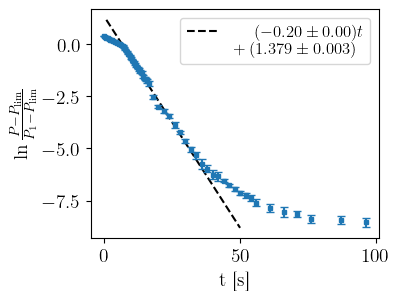

In [5]:
start, end = 12, 40
coefs, cov = np.polyfit(time[idx][start:end-1], unp.nominal_values(plog[start:end-1]), 1, cov=True)
fit = np.poly1d(coefs)
errcoefs = unp.uarray(coefs, cov[(0,1),(0,1)])
x = np.linspace(time[idx][start] - 5, time[idx][end] + 20, 100)

plt.plot(x, fit(x), '--', c='k', label=r"$({:.2fL})t\\+({:.1uL})$".format(*errcoefs))

plt.errorbar(time[idx], unp.nominal_values(plog), yerr=unp.std_devs(plog), marker='s', ls='none')
plt.xlabel(r"t [\unit{\second}]")
plt.ylabel(r"$\ln{\frac{P - P_\textrm{lim}}{P_1 - P_\textrm{lim}}}$")
plt.legend()

plt.tight_layout(pad=0.5)
plt.ticklabel_format(axis='y', style='sci', scilimits=(1,0))
plt.savefig("../figures/cinetique_palettes.pdf")

In [6]:
S = -V * errcoefs[0]
f"{S=:.1uP} L/s"

'S=1.12±0.01 L/s'

## Pompe à diffusion

In [7]:
data = np.loadtxt("../data/diffusion.csv", float, delimiter=",", skiprows=1)
t_start = 3
time = data[:,0] - t_start  # s
pressure = unp.uarray(data[:,1], data[:,2])  # mbar
V = ufloat(5.5, 0.05)  # L

In [8]:
p1 = pressure[3]
idx = time < 100
plim = ufloat(1.2e-5, 1e-6)
plog = unp.log((pressure[idx] - plim) / (p1 - plim))
f"{p1=:.1uP}"

'p1=0.049±0.005'

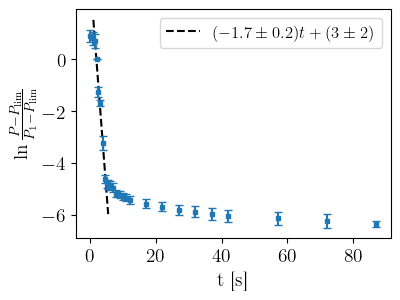

In [9]:
start, end = 3, 7
coefs, cov = np.polyfit(time[idx][start:end-1], unp.nominal_values(plog[start:end-1]), 1, cov=True)
fit = np.poly1d(coefs)
errcoefs = unp.uarray(coefs, cov[(0,1),(0,1)])
x = np.linspace(time[idx][start] - 1, time[idx][end] + 1, 100)

plt.plot(x, fit(x), '--', c='k', label=r"$({:.1uL})t+({:.1uL})$".format(*errcoefs))

plt.errorbar(time[idx], unp.nominal_values(plog), yerr=unp.std_devs(plog), marker='s', ls='none')
plt.xlabel(r"t [\unit{\second}]")
plt.ylabel(r"$\ln{\frac{P - P_\textrm{lim}}{P_1 - P_\textrm{lim}}}$")
plt.legend()

plt.tight_layout(pad=0.5)
plt.ticklabel_format(axis='y', style='sci', scilimits=(1,0))
plt.savefig("../figures/cinetique_diffusion.pdf")

In [10]:
S = -V * errcoefs[0]
f"{S=:.1uP} L/s" # L / s

'S=9±1 L/s'